User Over view analysis for a Telecom data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%reload_ext autoreload

Importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

import warnings
warnings.filterwarnings('ignore')

In [4]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from preprocessing import PreProcess
from overview import Overview
from plot import Plot

In [5]:
pl = Plot()

In [6]:
#reading the cleaned data in EDA
df_org = pd.read_csv("C:\\Users\\1221\\Desktop\\Telecommunication-Data\\data\\cleaned telecom data.csv")

In [7]:
df = df_org.copy()

Get Data overview

In [8]:
# Get data overview
df.head(6)

,Bearer Id,Start,Start ms,End,End ms,IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),...,Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Avg Bearer TP DL (Bytes/s),Avg Bearer TP UL (Bytes/s),Dur. (s),Activity Duration DL (s),Activity Duration UL (s),RTT,TCP retransmission
0,1.031305,4/28/2019 2:43,-1.192254,4/29/2019 4:03,-0.908588,-0.055039,-0.002510,-0.582247,L74543C,-0.135939,...,0.924968,0.575116,-1.706642,-0.556274,-0.373847,-0.168122,-0.319267,-0.299392,-3.005272e-01,0.000000
1,-0.964193,4/28/2019 2:43,0.193611,4/29/2019 10:09,-0.381025,0.013799,-0.002509,-0.581318,T79696B,0.000000,...,-1.679514,-0.476903,-0.244959,-0.557894,-0.382889,0.102771,-0.322928,-0.304971,4.613194e-17,0.000000
2,-0.989136,4/28/2019 2:43,1.194898,4/29/2019 2:43,1.153073,0.001275,-0.002636,1.696797,T77477B,-0.039100,...,-0.931460,-0.902833,0.214852,0.586901,1.448078,-0.227911,1.663305,1.797104,-2.189841e-02,-0.053624
3,1.006361,4/28/2019 2:43,-0.582474,4/29/2019 2:43,-0.797522,0.004962,-0.002506,1.696797,T77530B,-0.072621,...,0.017814,0.569101,0.313547,0.194945,0.193850,-0.227911,0.841131,1.000126,6.587547e-01,-0.182074
4,1.031305,4/28/2019 2:43,1.250333,4/29/2019 6:18,-1.703404,-0.090185,-0.002624,-0.559024,L11222C,0.000000,...,-1.568276,-1.538527,1.672006,-0.557188,-0.375354,-0.068601,-0.320186,-0.301142,4.613194e-17,0.000000
5,-0.989136,4/28/2019 2:43,-0.041986,4/29/2019 0:39,-1.436151,0.532229,-0.002621,-0.563731,D14878A,-0.163873,...,0.276536,-0.596801,-1.394059,3.229604,-0.120461,-0.319622,0.262751,0.421212,-3.024916e-01,-0.223925


In [9]:
df.shape
# number of data points
print(f" There are {df.shape[0]} rows and {df.shape[1]} columns")

 There are 148027 rows and 57 columns


In [10]:
# Get column names
df.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Byte

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148027 entries, 0 to 148026
Data columns (total 57 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 148027 non-null  float64
 1   Start                                     148027 non-null  object 
 2   Start ms                                  148027 non-null  float64
 3   End                                       148027 non-null  object 
 4   End ms                                    148027 non-null  float64
 5   IMSI                                      148027 non-null  float64
 6   MSISDN/Number                             148027 non-null  float64
 7   IMEI                                      148027 non-null  float64
 8   Last Location Name                        148027 non-null  object 
 9   Avg RTT DL (ms)                           148027 non-null  float64
 10  Avg RTT UL (ms)     

In [12]:
df.describe()

,Bearer Id,Start ms,End ms,IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),...,Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Avg Bearer TP DL (Bytes/s),Avg Bearer TP UL (Bytes/s),Dur. (s),Activity Duration DL (s),Activity Duration UL (s),RTT,TCP retransmission
count,1.480270e+05,1.480270e+05,1.480270e+05,1.480270e+05,1.480270e+05,1.480270e+05,1.480270e+05,1.480270e+05,1.480270e+05,1.480270e+05,...,1.480270e+05,1.480270e+05,1.480270e+05,1.480270e+05,1.480270e+05,1.480270e+05,1.480270e+05,1.480270e+05,1.480270e+05,1.480270e+05
mean,-3.153658e-16,-4.336880e-17,-1.968036e-18,-1.201757e-12,5.052093e-17,-2.215721e-16,2.647249e-17,6.240115e-17,1.401626e-17,1.491628e-17,...,-8.705561e-17,1.608510e-16,-5.762507e-17,6.297716e-17,1.228823e-17,2.202281e-16,3.686468e-17,3.878472e-17,5.187696e-17,1.346425e-17
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,...,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.419974e+00,1.420860e+00
min,-1.113855e+00,-1.729277e+00,-1.731170e+00,-1.040789e-01,-2.691705e-03,-2.144050e+00,-2.011189e-01,-2.295133e-01,-1.773769e-01,-4.813483e-02,...,-1.733166e+00,-3.392309e+00,-1.832823e+00,-5.581431e-01,-3.848264e-01,-1.207390e+00,-3.229275e-01,-3.049707e-01,-4.306322e-01,-2.255089e-01
25%,-9.641927e-01,-8.631113e-01,-8.599969e-01,-1.921779e-02,-2.634228e-03,-5.788417e-01,-1.359389e-01,-1.905583e-01,-1.663232e-01,-4.424296e-02,...,-8.635265e-01,-7.005825e-01,-8.665361e-01,-5.563567e-01,-3.747082e-01,-5.812464e-01,-3.202306e-01,-3.002386e-01,-3.098897e-01,-1.773746e-01
50%,-9.641927e-01,-4.103472e-04,4.234976e-03,-9.750331e-03,-2.620084e-03,-5.671811e-01,-1.024177e-01,-1.386184e-01,0.000000e+00,0.000000e+00,...,7.275870e-04,1.881839e-03,5.301190e-03,-5.554843e-01,-3.710484e-01,-2.279113e-01,-3.159441e-01,-2.948061e-01,-2.093261e-01,0.000000e+00
75%,1.006361e+00,8.657553e-01,8.719376e-01,4.953423e-03,-2.596954e-03,1.685302e+00,0.000000e+00,4.613194e-17,0.000000e+00,0.000000e+00,...,8.633041e-01,7.018835e-01,8.645466e-01,2.753299e-01,-1.396210e-01,3.447955e-01,-2.008427e-01,-1.731803e-01,4.613194e-17,0.000000e+00
max,1.056248e+00,1.731921e+00,1.736169e+00,3.832779e+02,3.847415e+02,2.261026e+00,1.802974e+02,9.222360e+01,3.637447e+01,1.830792e+02,...,1.739937e+00,3.299816e+00,1.836074e+00,1.515168e+01,1.223345e+01,2.168251e+01,2.351995e+01,3.073041e+01,1.800809e+02,1.829459e+02


In [13]:
top10 = df['Handset Type'].value_counts().nlargest(10)
top10.head(10)

Handset Type
Huawei B528S-23A                19398
Apple iPhone 6S (A1688)          9399
Apple iPhone 6 (A1586)           9004
undefined                        8918
Apple iPhone 7 (A1778)           6292
Apple iPhone Se (A1723)          5175
Apple iPhone 8 (A1905)           4977
Apple iPhone Xr (A2105)          4555
Samsung Galaxy S8 (Sm-G950F)     4464
Apple iPhone X (A1901)           3796
Name: count, dtype: int64

In [14]:
new_df = pd.DataFrame()

new_df['handset_type'] = top10.index
new_df['count'] = top10.values

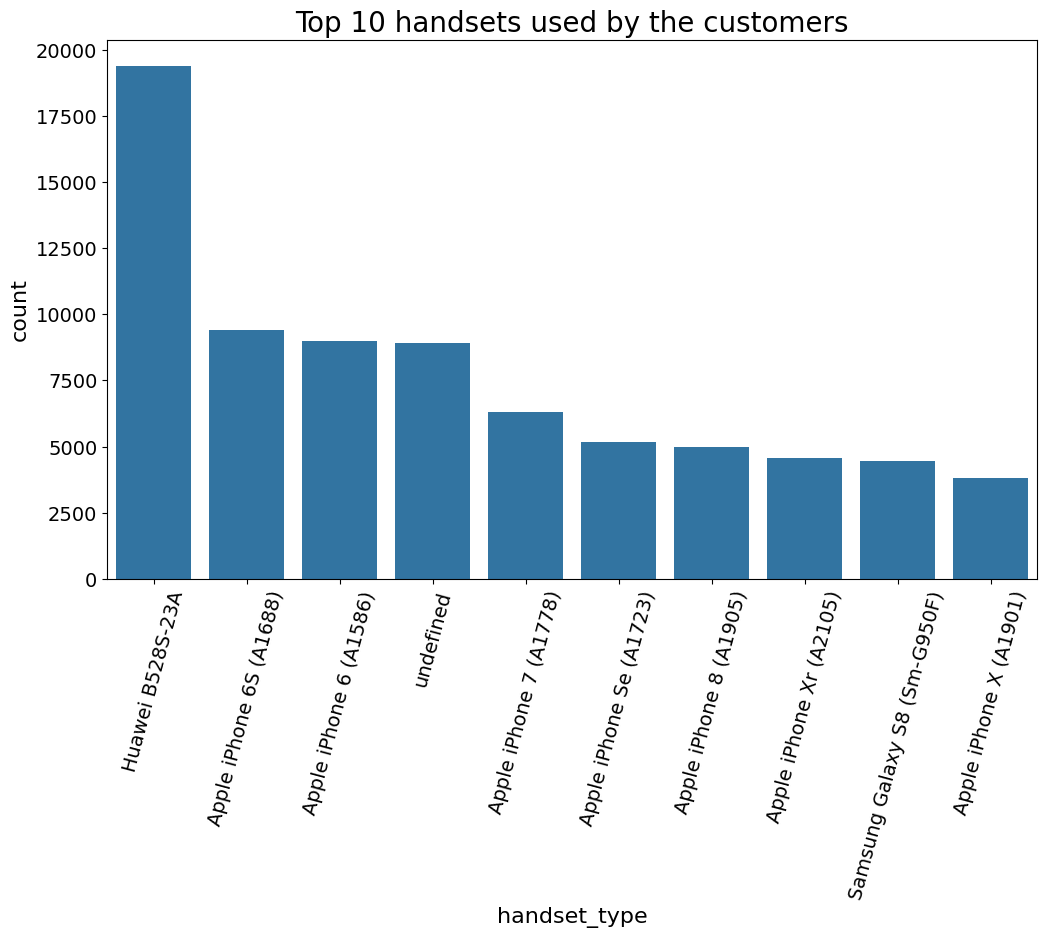

In [15]:
# plot graph for top10
pl.plot_bar(new_df, "handset_type", "count", 'Top 10 handsets used by the customers', 'handset_type', 'count')

In [16]:
top_3_manuf = df['Handset Manufacturer'].value_counts().nlargest(3)
top_3_manuf

Handset Manufacturer
Apple      59348
Samsung    40367
Huawei     33911
Name: count, dtype: int64

In [17]:
new_df = pd.DataFrame()
new_df['handset_manufacturer'] = top_3_manuf.index
new_df['count'] = top_3_manuf.values

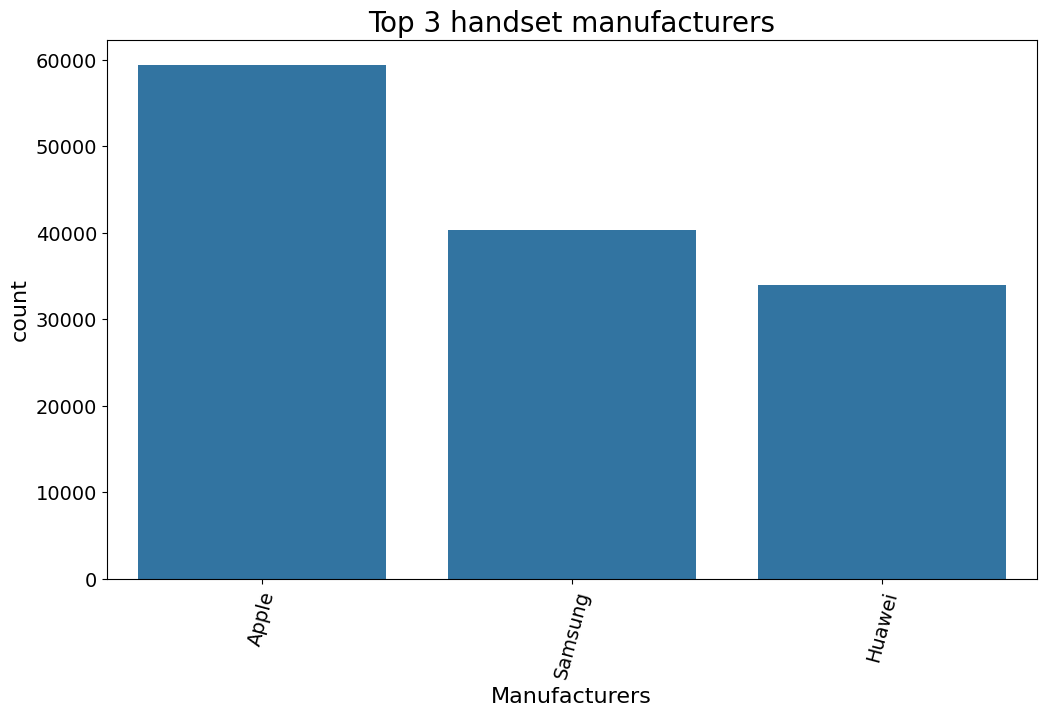

In [18]:
# plot graph for top3
pl.plot_bar(new_df, 'handset_manufacturer', 'count', 'Top 3 handset manufacturers', 'Manufacturers', 'count')

In [19]:
appCount = df.groupby('Handset Manufacturer')['Handset Type'].value_counts()['Apple'].nlargest(5)
new_df = pd.DataFrame()
new_df['Handset'] = appCount.index
new_df['count'] = appCount.values

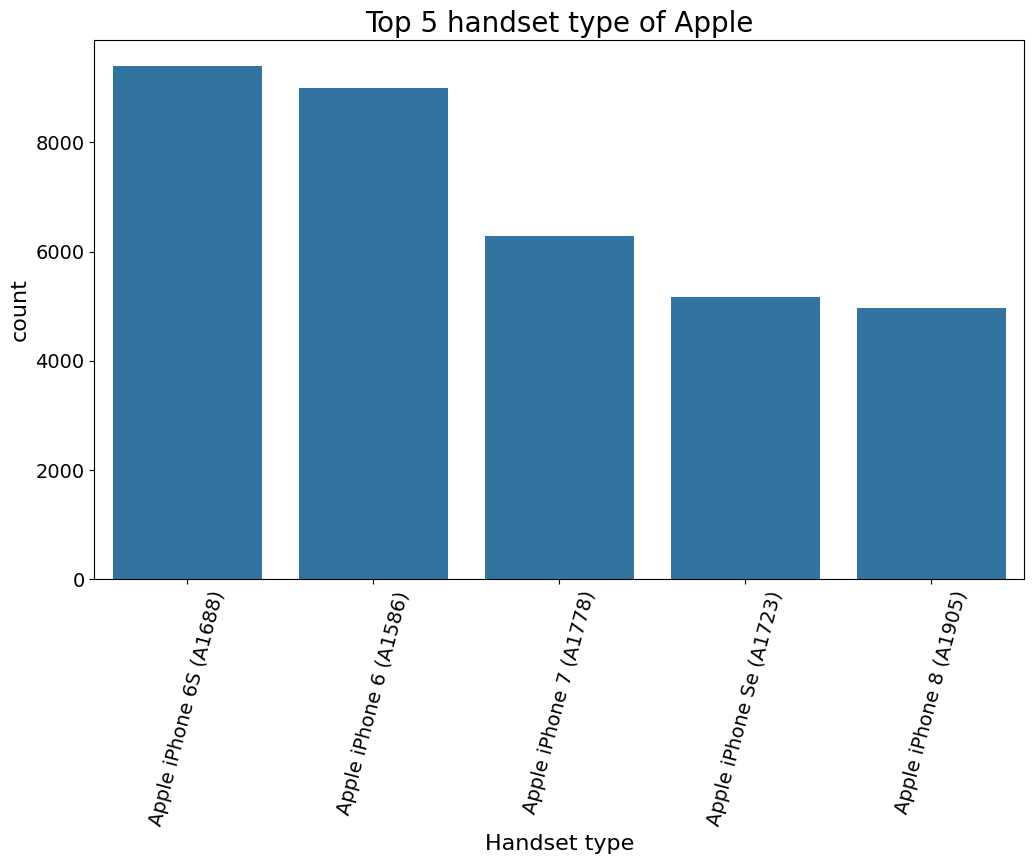

In [20]:
# plot graph for top 5
pl.plot_bar(new_df, 'Handset', 'count', 'Top 5 handset type of Apple', 'Handset type', 'count')

In [21]:
appCount

Handset Type
Apple iPhone 6S (A1688)    9399
Apple iPhone 6 (A1586)     9004
Apple iPhone 7 (A1778)     6292
Apple iPhone Se (A1723)    5175
Apple iPhone 8 (A1905)     4977
Name: count, dtype: int64

In [22]:
sam = df.groupby('Handset Manufacturer')['Handset Type'].value_counts()['Samsung'].nlargest(5)
new_df = pd.DataFrame()
new_df['Handset'] = sam.index
new_df['count'] = sam.values

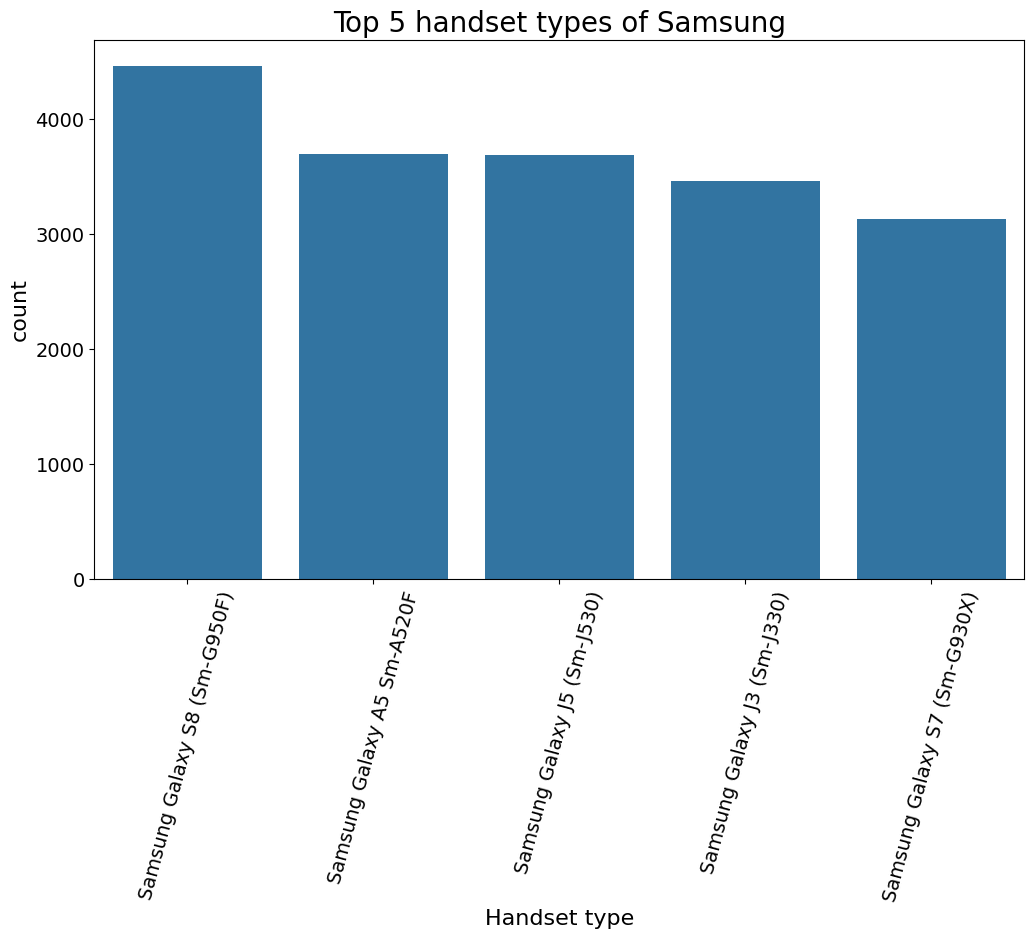

In [23]:
# plot graph for top10
pl.plot_bar(new_df, 'Handset', 'count', 'Top 5 handset types of Samsung', 'Handset type', 'count')

In [24]:
sam

Handset Type
Samsung Galaxy S8 (Sm-G950F)    4464
Samsung Galaxy A5 Sm-A520F      3698
Samsung Galaxy J5 (Sm-J530)     3687
Samsung Galaxy J3 (Sm-J330)     3459
Samsung Galaxy S7 (Sm-G930X)    3134
Name: count, dtype: int64

In [25]:
huawCount = df.groupby('Handset Manufacturer')['Handset Type'].value_counts()['Huawei'].nlargest(5)
new_df = pd.DataFrame()
new_df['Handset'] = huawCount.index
new_df['count'] = huawCount.values

huawCount

Handset Type
Huawei B528S-23A                  19398
Huawei E5180                       2068
Huawei P20 Lite Huawei Nova 3E     2010
Huawei P20                         1476
Huawei Y6 2018                      994
Name: count, dtype: int64

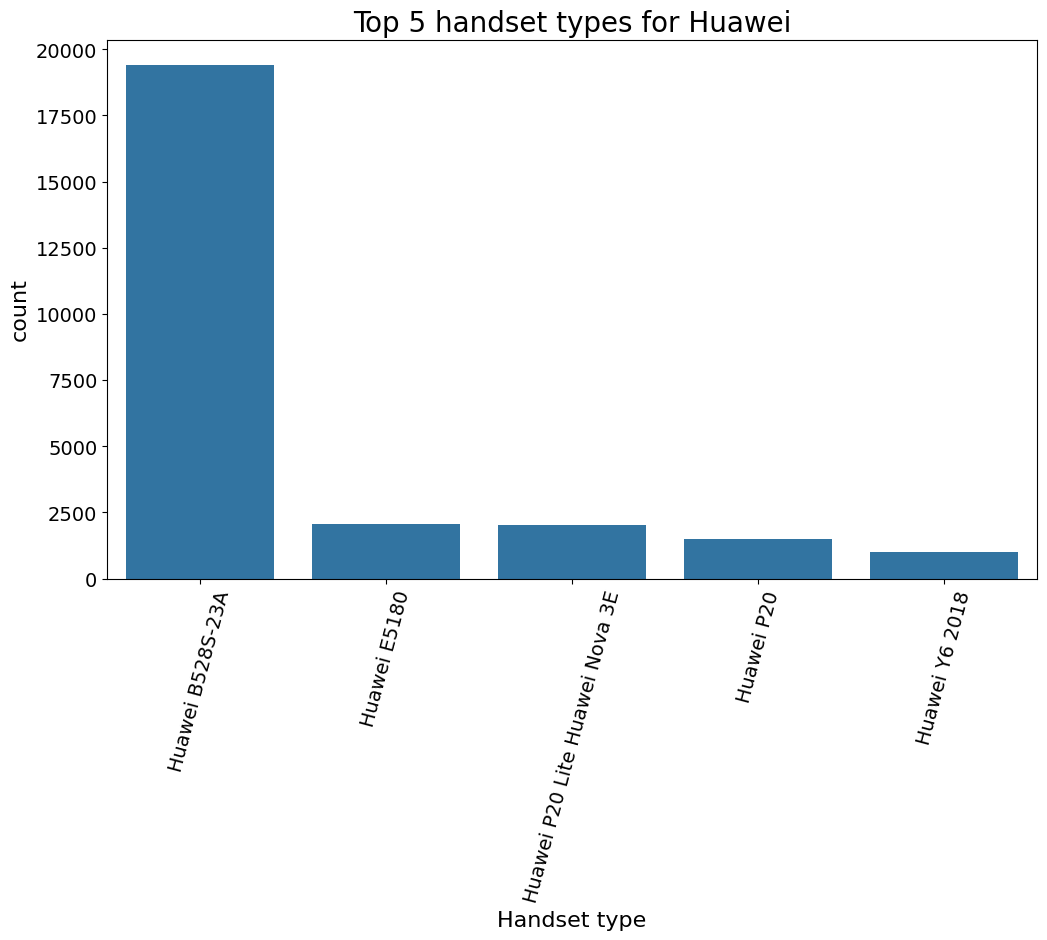

In [26]:
pl.plot_bar(new_df, 'Handset', 'count', 'Top 5 handset types for Huawei', 'Handset type', 'count')

Interpretation and recommendation to marketing teams
Based on the above analysis, The following is recommended: As most of the users are using devices from Manufacturers of Apple, Samsung, and Huawei, the sales team should focus on these product owners. Customers' best-performing devices might be promoted by the marketing team. Huawei may be considered for a cross promotion due to their products holding the most slots in the top ten handsets. Samsung and Apple are also considered for cross promotion.

Task 1.1 Aggregate per user the following information in the column

Aggregation per user
Number of xDR sessions

In [27]:
# number of xDR sessions
df.groupby('MSISDN/Number')['Bearer Id'].count().nlargest(10)

MSISDN/Number
 0.000000    487
-0.002663     18
-0.002676     17
-0.002663     17
-0.002625     16
-0.002606     15
-0.002510     15
-0.002616     13
-0.002689     12
-0.002688     12
Name: Bearer Id, dtype: int64

In [28]:
# Session Duration
df.groupby('MSISDN/Number')['Dur. (ms).1'].sum().nlargest(10)

MSISDN/Number
-0.002663    207.266141
-0.002676    101.147462
-0.002510     95.242921
-0.002616     91.228500
-0.002663     85.331220
-0.002619     66.056935
-0.002689     62.157989
-0.002616     62.048831
-0.002580     54.611970
-0.002510     50.218745
Name: Dur. (ms).1, dtype: float64

In [29]:
#  total download (DL) 
df.groupby('MSISDN/Number')[['Total DL (Bytes)', 'Total UL (Bytes)']].sum().nlargest(10, 'Total DL (Bytes)')

,Total DL (Bytes),Total UL (Bytes)
MSISDN/Number,,
0.000000,14.697002,30.671010
-0.002617,7.790892,-4.191480
-0.002620,7.068492,2.305050
-0.002618,6.794854,0.684516
-0.002618,6.544071,2.481884
-0.002671,6.378867,-1.000462
-0.002625,6.346693,0.321676
-0.002622,6.309512,-1.698308
-0.002667,6.285164,-3.661152


In [30]:
#  total download (DL) 
df.groupby('MSISDN/Number')[['Total DL (Bytes)', 'Total UL (Bytes)']].sum().nlargest(10, 'Total UL (Bytes)')

,Total DL (Bytes),Total UL (Bytes)
MSISDN/Number,,
0.000000,14.697002,30.671010
-0.002580,2.952442,7.934761
-0.002510,4.061101,7.685786
-0.002509,0.033576,7.560885
-0.002580,4.134164,6.918439
-0.002625,-3.630133,6.643854
-0.002627,-2.067977,6.587301
-0.002515,-1.551685,6.545358
-0.002625,-2.341929,6.465191


Total data volume (in Bytes) during this session for each application

In [31]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)',
       '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
       'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)',
       '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)',
       'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)',
       'Dur. (ms).1', 'Handset Manufacturer', 'Handset Type',
       'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
       'Social Media DL (Bytes)', 'Social Media UL (Bytes)'

In [32]:
df["social_media"] = df["Social Media DL (Bytes)"] + df['Social Media UL (Bytes)']
df["google"] = df["Google DL (Bytes)"] + df["Google UL (Bytes)"]
df['email'] = df["Email DL (Bytes)"] + df["Email UL (Bytes)"]
df['youtube'] = df["Youtube DL (Bytes)"] + df["Youtube UL (Bytes)"]
df['netflix'] = df["Netflix DL (Bytes)"] + df["Netflix UL (Bytes)"]
df["gaming"] = df["Gaming DL (Bytes)"] + df["Gaming UL (Bytes)"]
df['other'] = df["Other DL (Bytes)"]+df["Other UL (Bytes)"]
df['total_data'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

In [33]:
user_data = df.groupby('MSISDN/Number')[['social_media', 'google', 'email', 'youtube','netflix', 'gaming', 'other', 'total_data']].sum().nlargest(20, 'total_data')
user_data = df.groupby('MSISDN/Number')[['social_media', 'google', 'email', 'youtube','netflix','gaming', 'other', 'total_data']].sum().sort_values('total_data', ascending=False)
user_data['MSISDN/Number'] = user_data.index

# user_data.drop(user_data.index, inplace=True)
user_data.head(8)

,social_media,google,email,youtube,netflix,gaming,other,total_data,MSISDN/Number
MSISDN/Number,,,,,,,,,
0.000000,36.102233,17.789960,-19.515378,4.602789,-12.750567,23.799446,1.003417,45.368012,0.000000
-0.002626,3.739456,-1.946838,-9.773869,5.421231,5.827425,4.631681,8.154412,11.948435,-0.002626
-0.002510,11.516101,3.859361,0.493798,8.760438,-0.509017,8.293502,-6.643144,11.746888,-0.002510
-0.002621,0.864856,-5.290795,0.170160,-0.441183,4.654550,10.127952,2.155536,11.153245,-0.002621
-0.002580,-5.505663,-3.384039,3.391437,8.112635,3.256725,8.574657,0.038113,11.052603,-0.002580
-0.002580,1.033820,4.733815,8.118351,5.931302,8.213352,6.739121,0.891782,10.887203,-0.002580
-0.002635,-0.054961,1.319071,3.027601,1.822140,4.407264,9.113057,-2.800834,9.757037,-0.002635
-0.002620,3.506478,-7.676657,5.163261,2.324436,8.574714,5.376255,-4.355483,9.373542,-0.002620


In [34]:
user_data['MSISDN/Number'] = user_data.index
user_data.head()

,social_media,google,email,youtube,netflix,gaming,other,total_data,MSISDN/Number
MSISDN/Number,,,,,,,,,
0.000000,36.102233,17.789960,-19.515378,4.602789,-12.750567,23.799446,1.003417,45.368012,0.000000
-0.002626,3.739456,-1.946838,-9.773869,5.421231,5.827425,4.631681,8.154412,11.948435,-0.002626
-0.002510,11.516101,3.859361,0.493798,8.760438,-0.509017,8.293502,-6.643144,11.746888,-0.002510
-0.002621,0.864856,-5.290795,0.170160,-0.441183,4.654550,10.127952,2.155536,11.153245,-0.002621
-0.002580,-5.505663,-3.384039,3.391437,8.112635,3.256725,8.574657,0.038113,11.052603,-0.002580


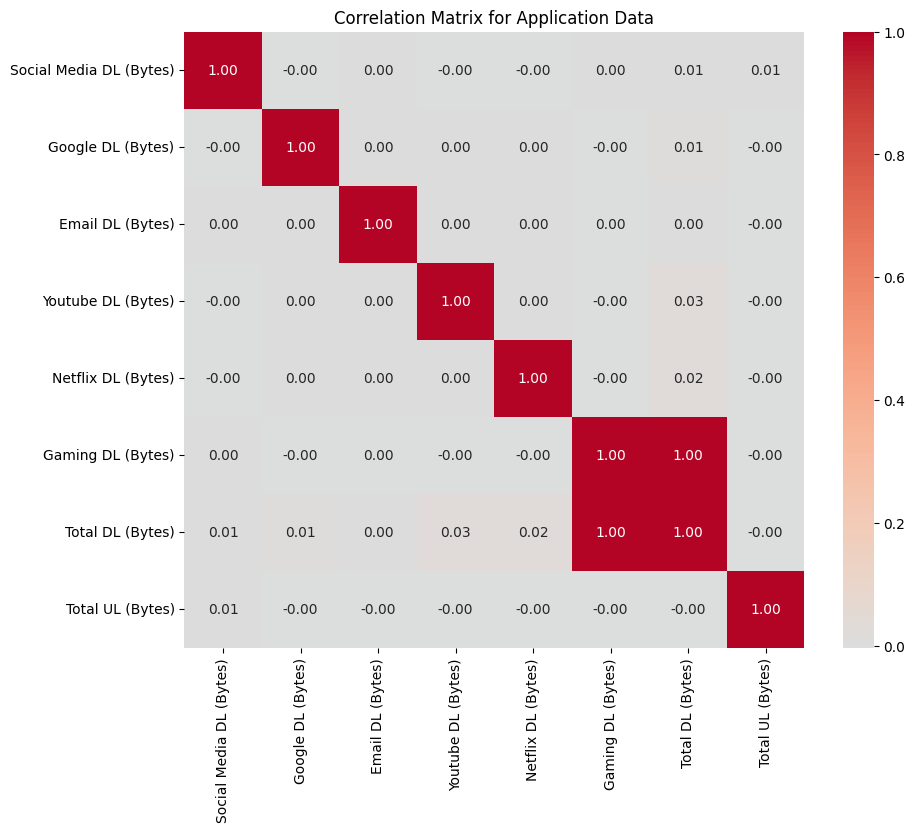

In [35]:
# Compute correlation matrix for applications data
app_data = df[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 
               'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 
               'Total DL (Bytes)', 'Total UL (Bytes)']]
corr_matrix = app_data.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Application Data')
plt.show()

Exploratory data analysis on those data
         
         Non-Graphical Univariate Analysis

In [36]:
# Non-Graphical Univariate analysis for the categorical variables
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = list(set(df.columns) - set(num_cols))
cat_cols

['End', 'Last Location Name', 'Handset Type', 'Handset Manufacturer', 'Start']

In [37]:
# Remove start & end date columns
cat_cols.remove('Start')
cat_cols.remove('End')

In [38]:
cat_cols

['Last Location Name', 'Handset Type', 'Handset Manufacturer']

Number of xDR sessions, Session duration, the total download (DL) and upload (UL) data , the total data volume (in Bytes) during this session for each application (Social Media, Google, Email, YouTube, Netflix, Gaming)

In [39]:
# Session aggregation of social_media per user
user_stat_per_app = df.groupby('MSISDN/Number').agg({'social_media': 'sum', 'google': sum, 'email': 'sum', 'youtube': 'sum', 'gaming': 'sum', 'other': 'sum'})

In [40]:
user_stat_per_app.describe()

,social_media,google,email,youtube,gaming,other
count,1.062940e+05,1.062940e+05,1.062940e+05,1.062940e+05,1.062940e+05,1.062940e+05
mean,2.045516e-17,1.238005e-16,-1.037464e-16,8.035001e-17,-3.355716e-17,-5.381178e-17
std,1.667653e+00,1.656225e+00,1.670662e+00,1.668248e+00,1.669564e+00,1.673243e+00
min,-1.144785e+01,-9.593070e+00,-1.951538e+01,-1.586643e+01,-1.138250e+01,-1.043582e+01
25%,-1.128174e+00,-1.120626e+00,-1.123386e+00,-1.125701e+00,-1.120777e+00,-1.125362e+00
50%,-2.327531e-03,-1.010294e-03,9.320377e-03,6.527958e-03,2.964665e-03,3.388181e-03
75%,1.125876e+00,1.111861e+00,1.115553e+00,1.123636e+00,1.121924e+00,1.124258e+00
max,3.610223e+01,1.778996e+01,1.047832e+01,1.037847e+01,2.379945e+01,1.038732e+01


In [41]:
# Session aggregation of Durations apps per user
user_stat_per = df.groupby('MSISDN/Number').agg({'Bearer Id': 'count', 'Dur. (ms).1': sum, 'Total UL (Bytes)': 'sum', 'Total DL (Bytes)': 'sum', 'total_data': 'sum'})

In [42]:
user_stat_per.describe()

,Bearer Id,Dur. (ms).1,Total UL (Bytes),Total DL (Bytes),total_data
count,106294.000000,1.062940e+05,1.062940e+05,1.062940e+05,1.062940e+05
mean,1.392619,2.406489e-17,2.258089e-16,-8.115217e-17,1.457263e-16
std,1.688403,1.915890e+00,1.184641e+00,1.181110e+00,1.673479e+00
min,1.000000,-2.050342e+02,-9.016136e+00,-7.308607e+00,-1.206323e+01
25%,1.000000,-7.844490e-01,-7.704994e-01,-9.082766e-01,-1.093467e+00
50%,1.000000,-2.279061e-01,7.203185e-04,9.084296e-03,-1.642231e-03
75%,2.000000,4.341198e-01,7.781437e-01,9.122212e-01,1.099323e+00
max,487.000000,2.072661e+02,3.067101e+01,1.469700e+01,4.536801e+01


In [43]:
# Handset_manufacturers distinct value
df["Handset Manufacturer"].value_counts()

Handset Manufacturer
Apple                                                59348
Samsung                                              40367
Huawei                                               33911
undefined                                             8918
Sony Mobile Communications Ab                          947
                                                     ...  
Ck Telecom Limited                                       1
Quanta                                                   1
Shenzhen Kelly The Communication Equipment Co Ltd        1
Test IMEI                                                1
ZyXEL Communications Corp                                1
Name: count, Length: 169, dtype: int64

In [44]:
# Handset_type distinct values
df["Handset Type"].value_counts()

Handset Type
Huawei B528S-23A                   19398
Apple iPhone 6S (A1688)             9399
Apple iPhone 6 (A1586)              9004
undefined                           8918
Apple iPhone 7 (A1778)              6292
                                   ...  
Sony Mobile Comm. Pm-0951-Bv           1
Doro Ab Doro 6530 Doro 6531            1
Tcl Communicatio. Alcatel A3           1
Tecno Telecom (H. Phantom6 Plus        1
Nokia Lumia 1020                       1
Name: count, Length: 1376, dtype: int64

In [45]:
df['total_data'].describe()

count    1.480270e+05
mean     1.022659e-16
std      1.412545e+00
min     -4.812215e+00
25%     -1.003055e+00
50%     -3.414922e-03
75%      1.003086e+00
max      4.759983e+00
Name: total_data, dtype: float64

In [46]:
df['Total DL (Bytes)'].describe()

count    1.480270e+05
mean    -5.762507e-17
std      1.000003e+00
min     -1.832823e+00
25%     -8.665361e-01
50%      5.301190e-03
75%      8.645466e-01
max      1.836074e+00
Name: Total DL (Bytes), dtype: float64

Univariate Graphical EDA

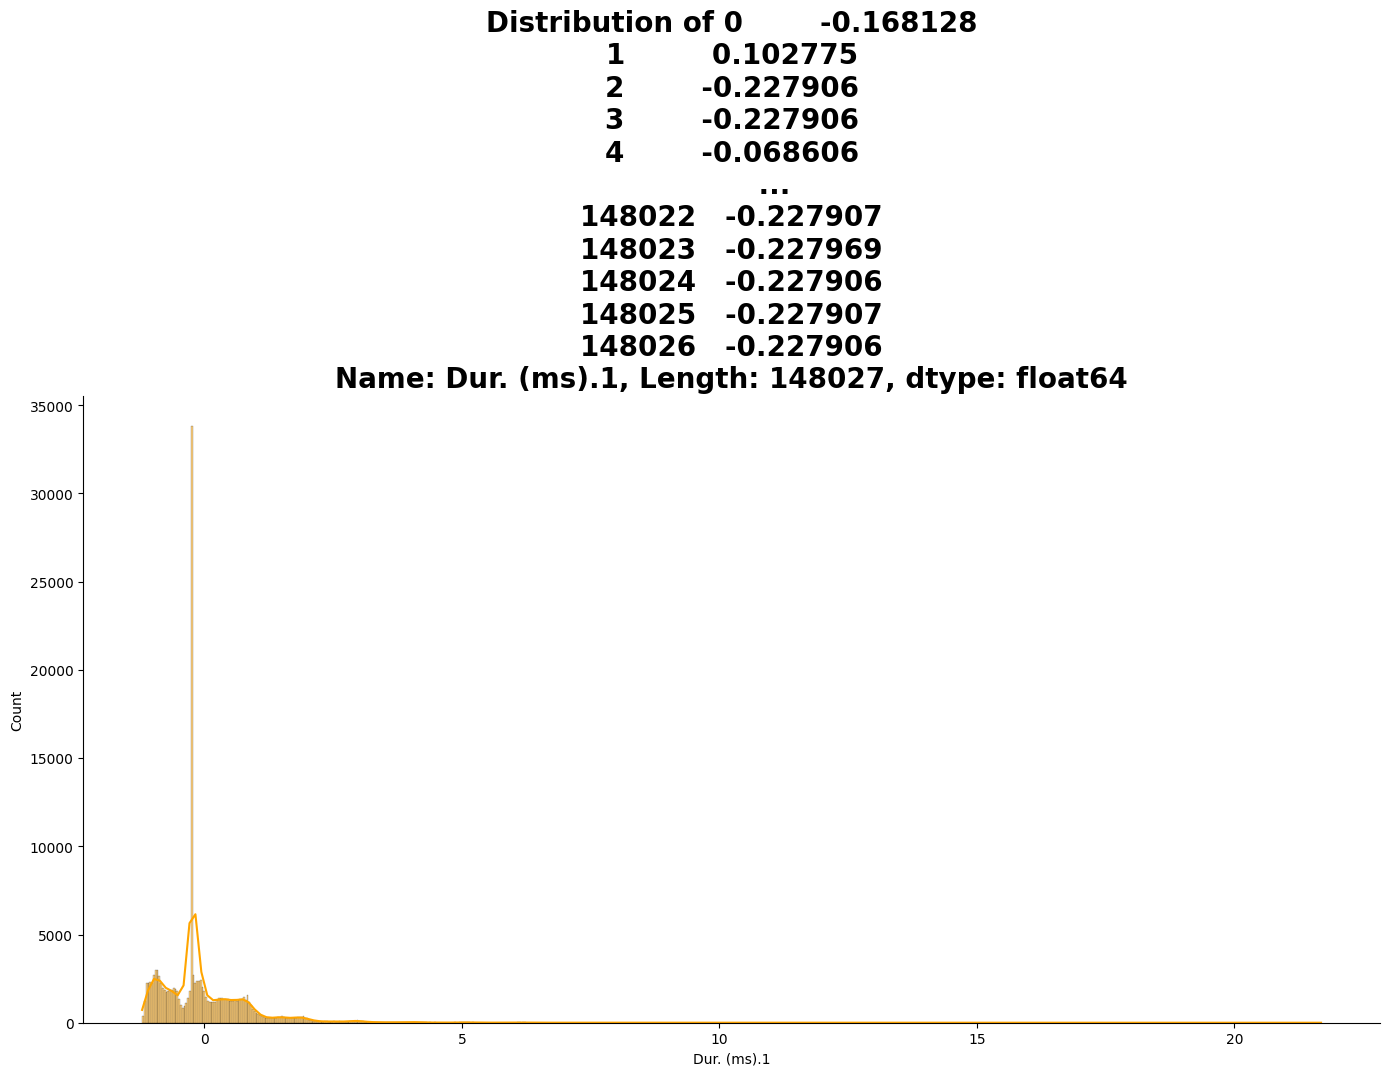

In [47]:
# Graphical Univariate analysis for duration
pl.plot_hist(df, df['Dur. (ms).1'], 'orange')

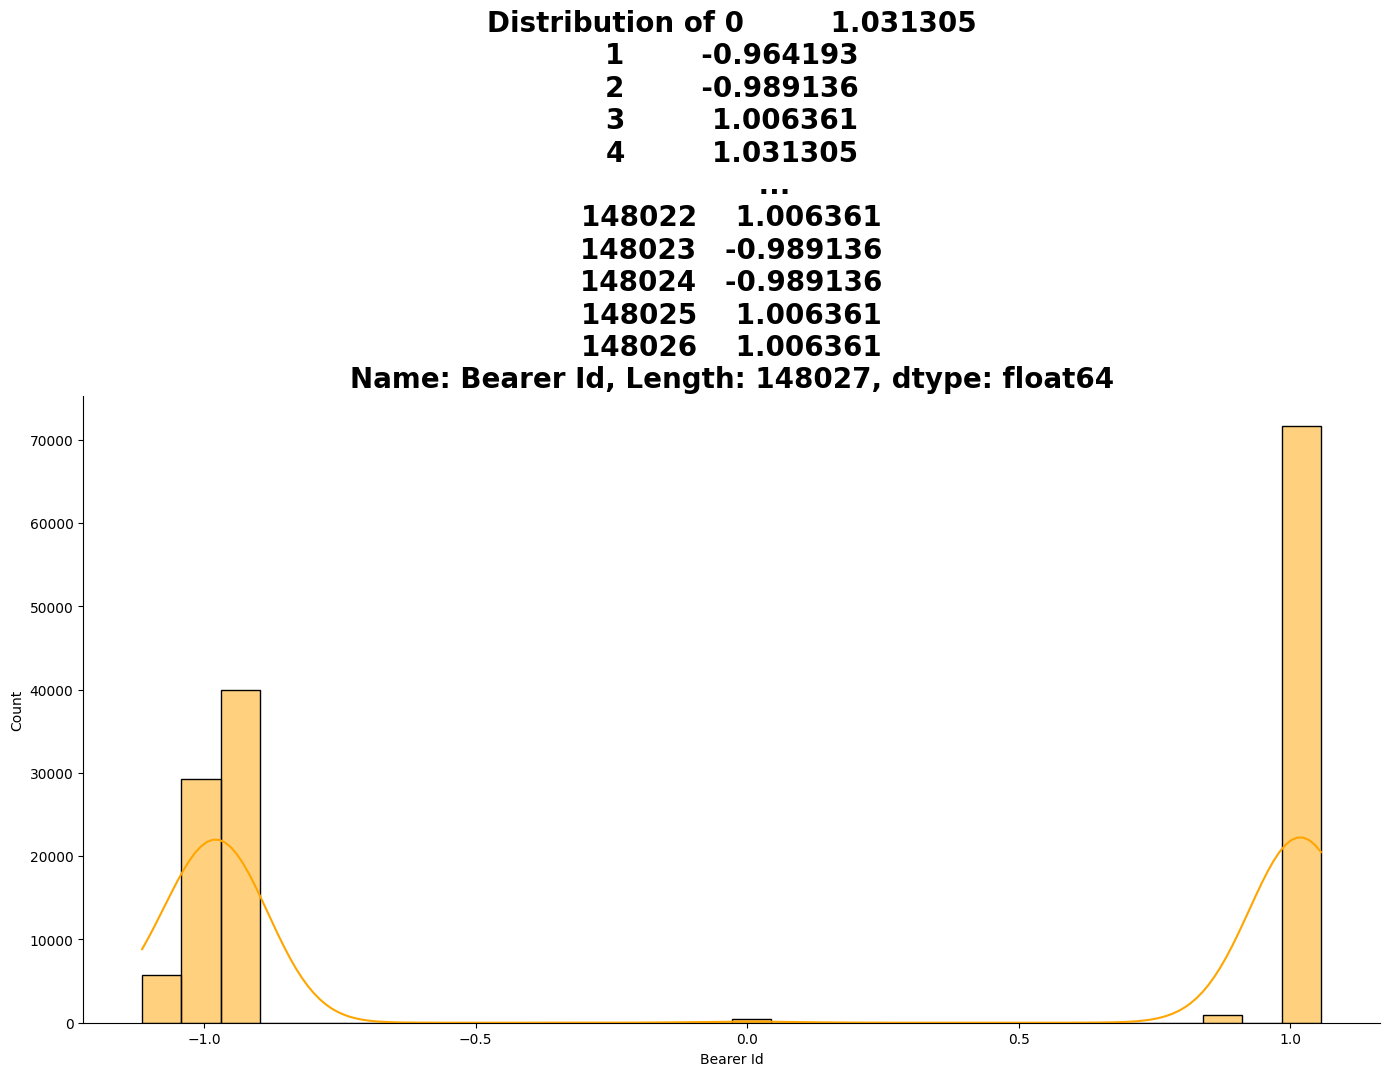

In [48]:
# Graphical Univariate analysis for beaer_id
pl.plot_hist(df, df['Bearer Id'], 'orange')

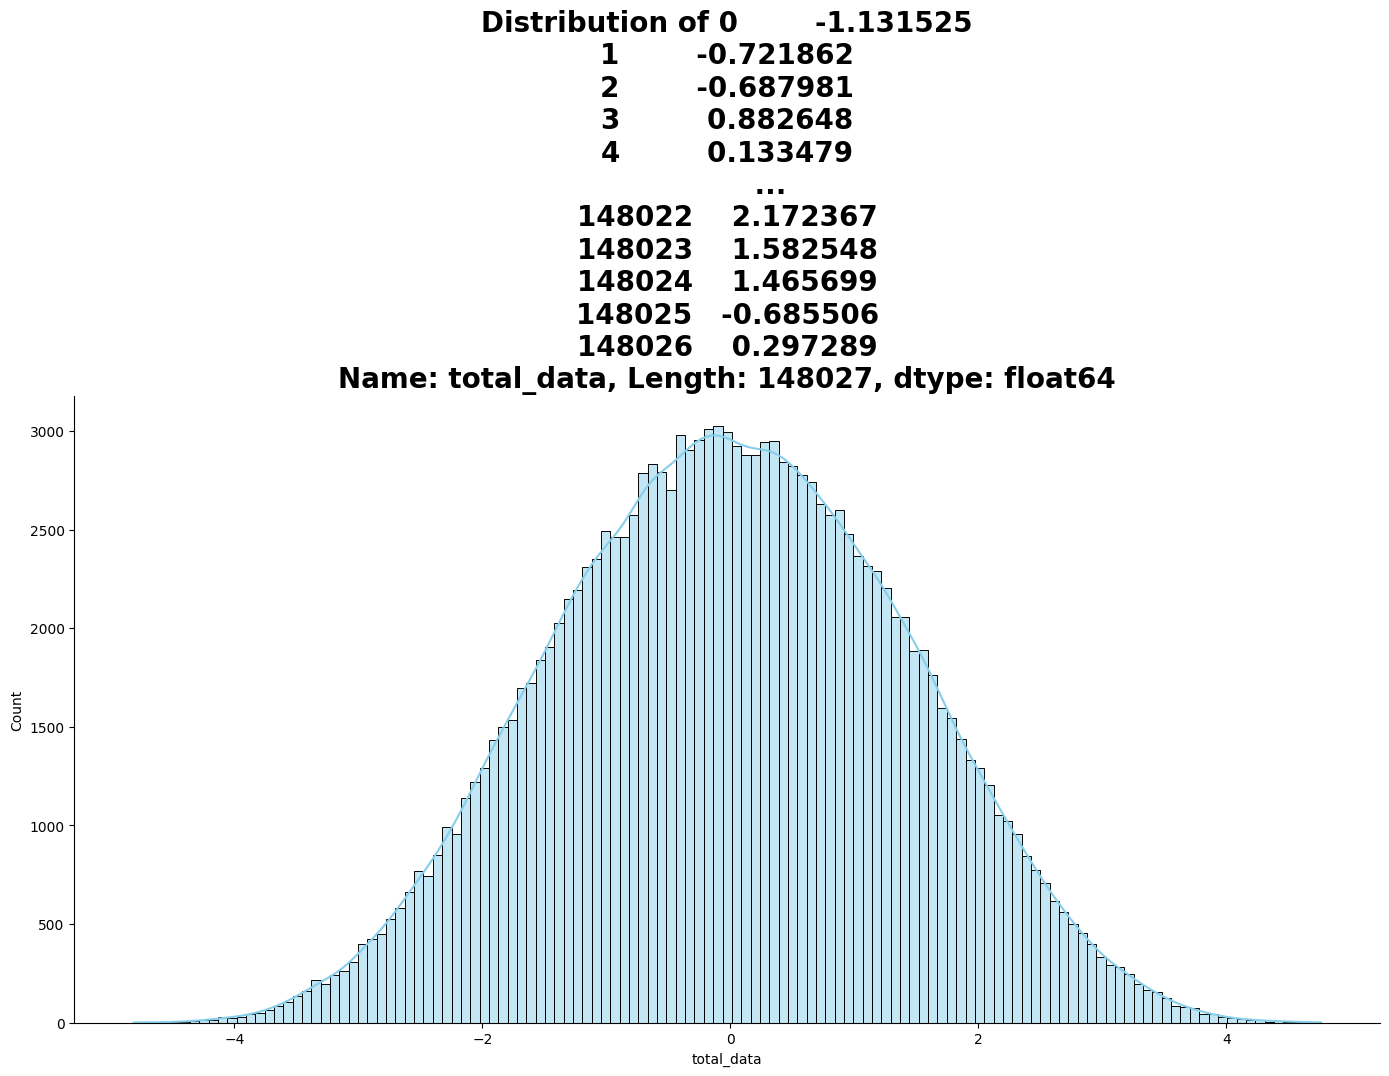

In [49]:
pl.plot_hist(df, df['total_data'], 'skyblue')

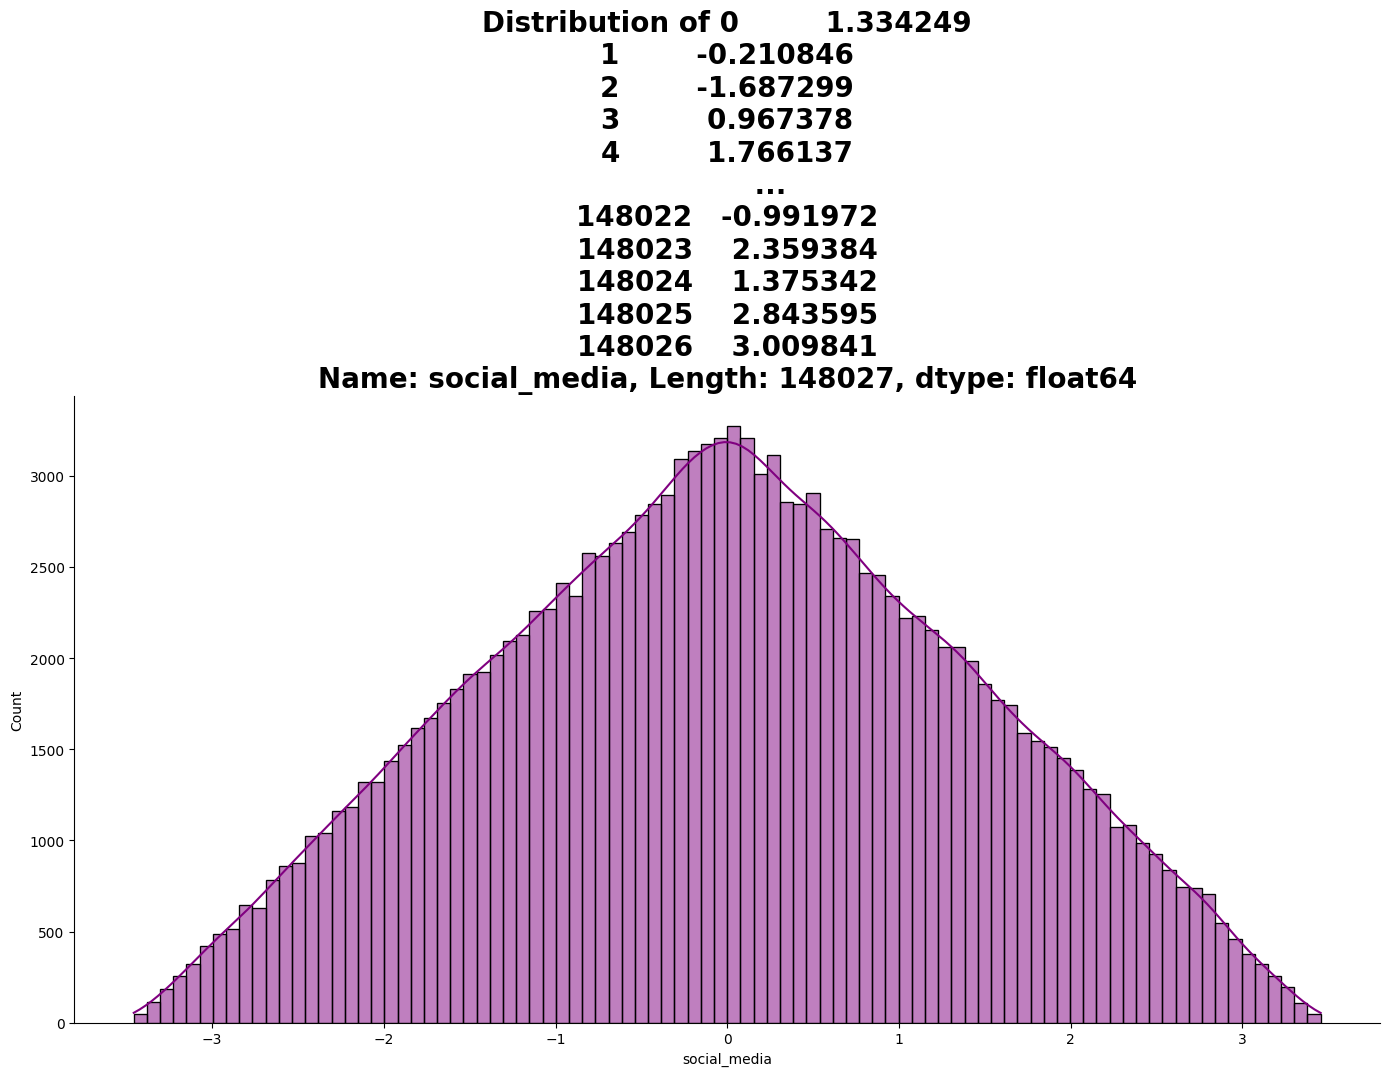

In [50]:
# Graphical Univariate analysis for Socail Media
pl.plot_hist(df, df['social_media'], 'purple')

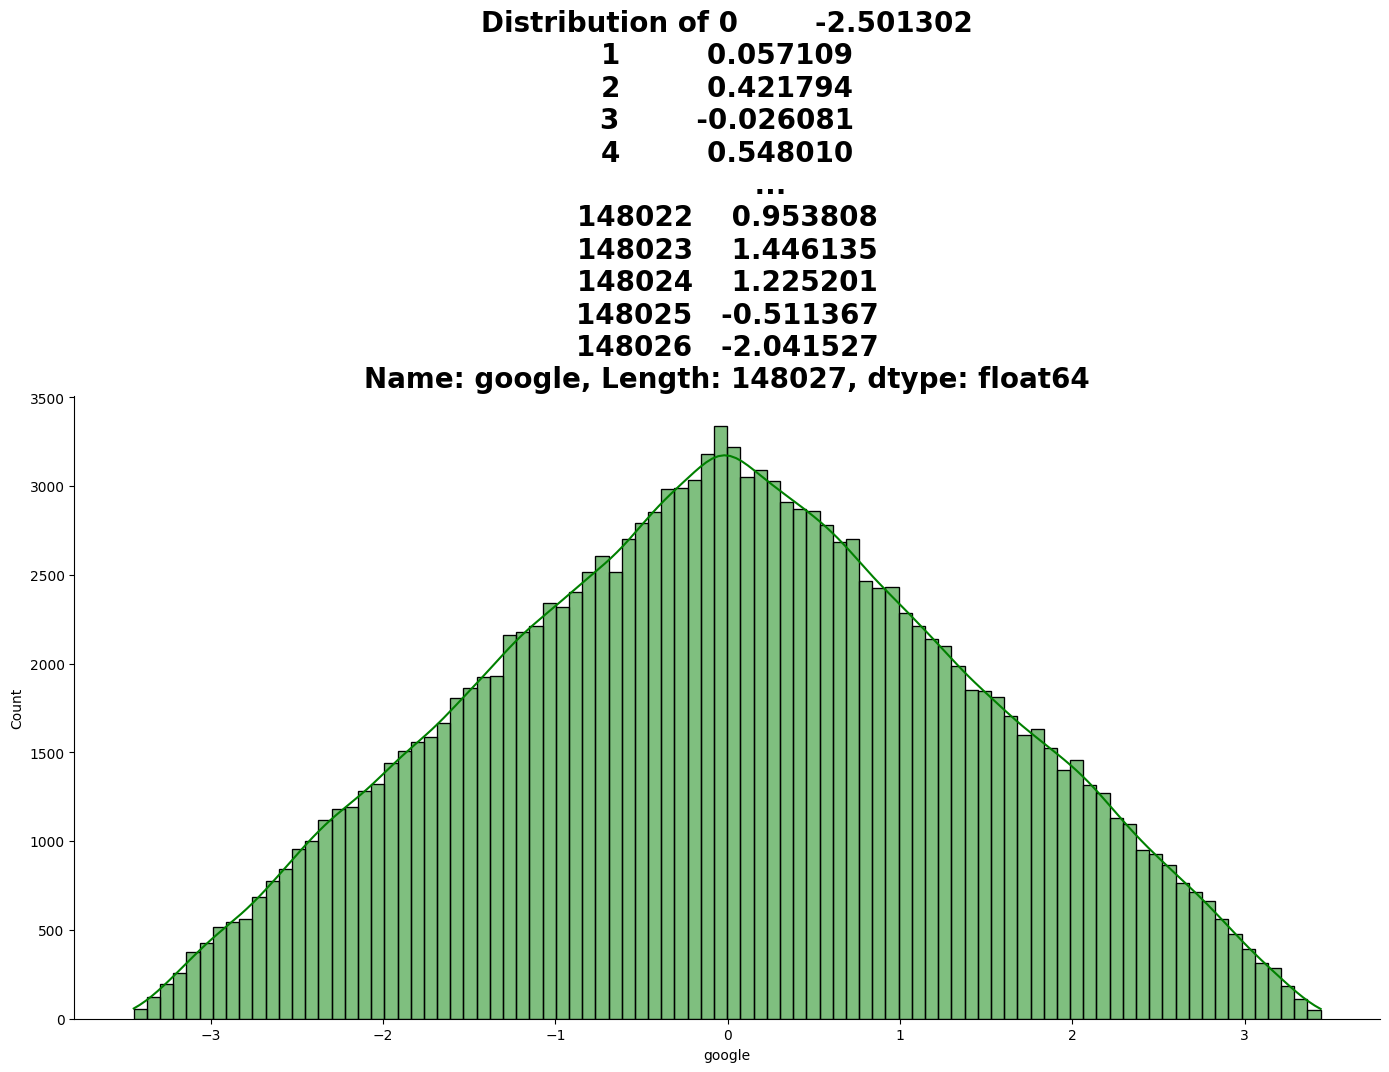

In [51]:
# Graphical Univariate analysis for Google
pl.plot_hist(df, df['google'], 'green')

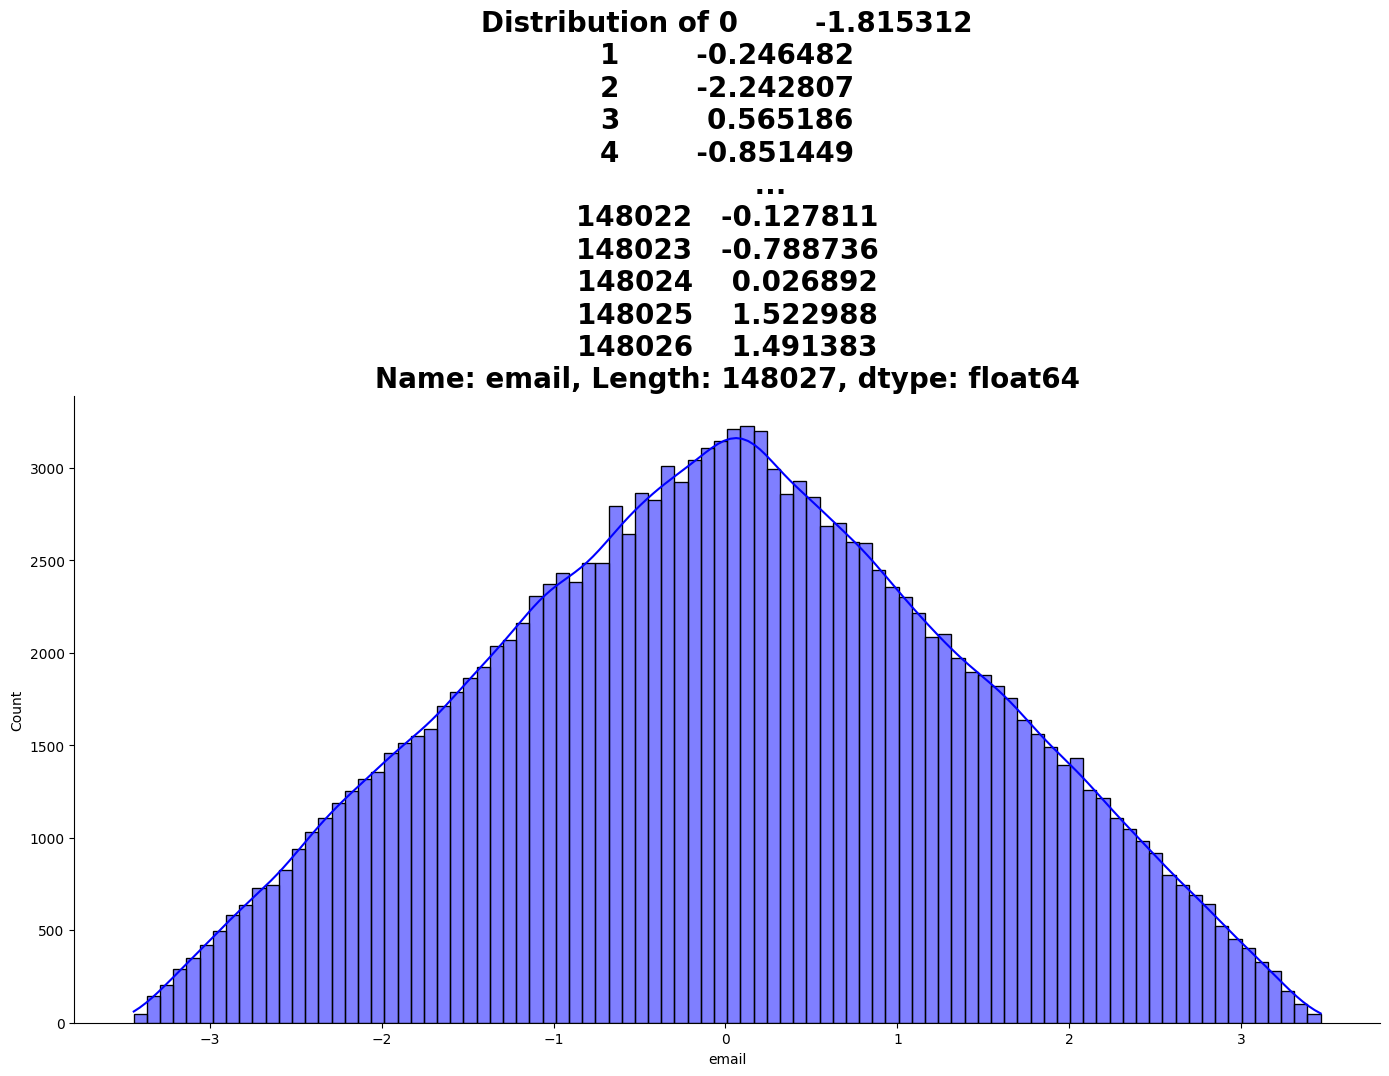

In [52]:
# Graphical Univariate analysis for Socail Media
pl.plot_hist(df, df['email'], 'blue')

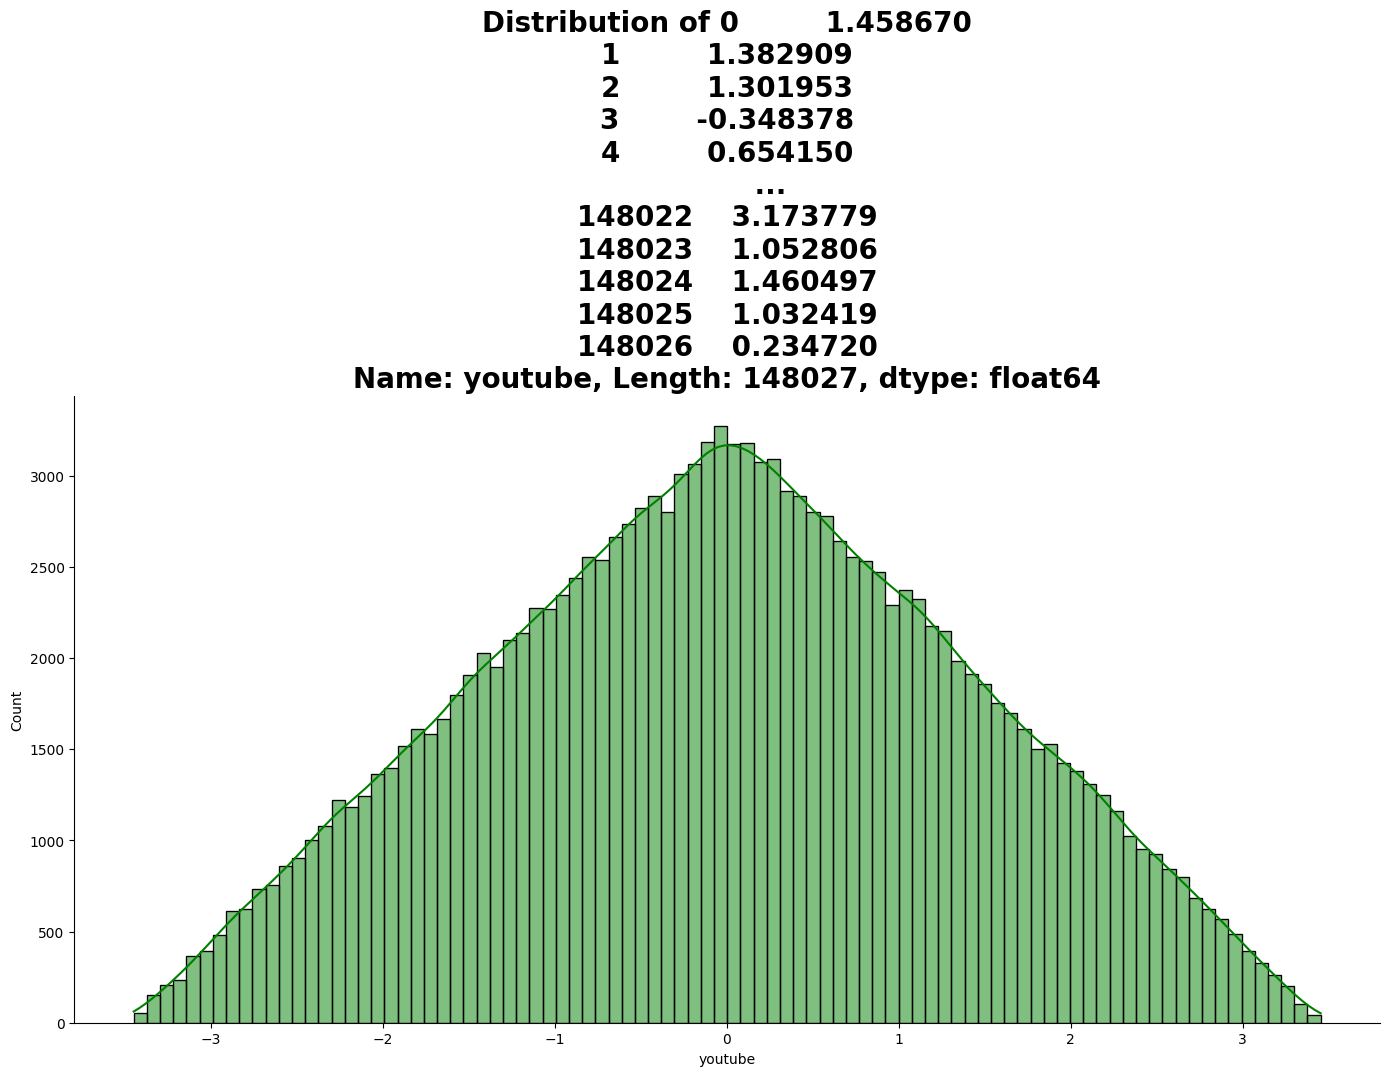

In [53]:
# Graphical Univariate analysis for Youtube
pl.plot_hist(df, df['youtube'], 'green')

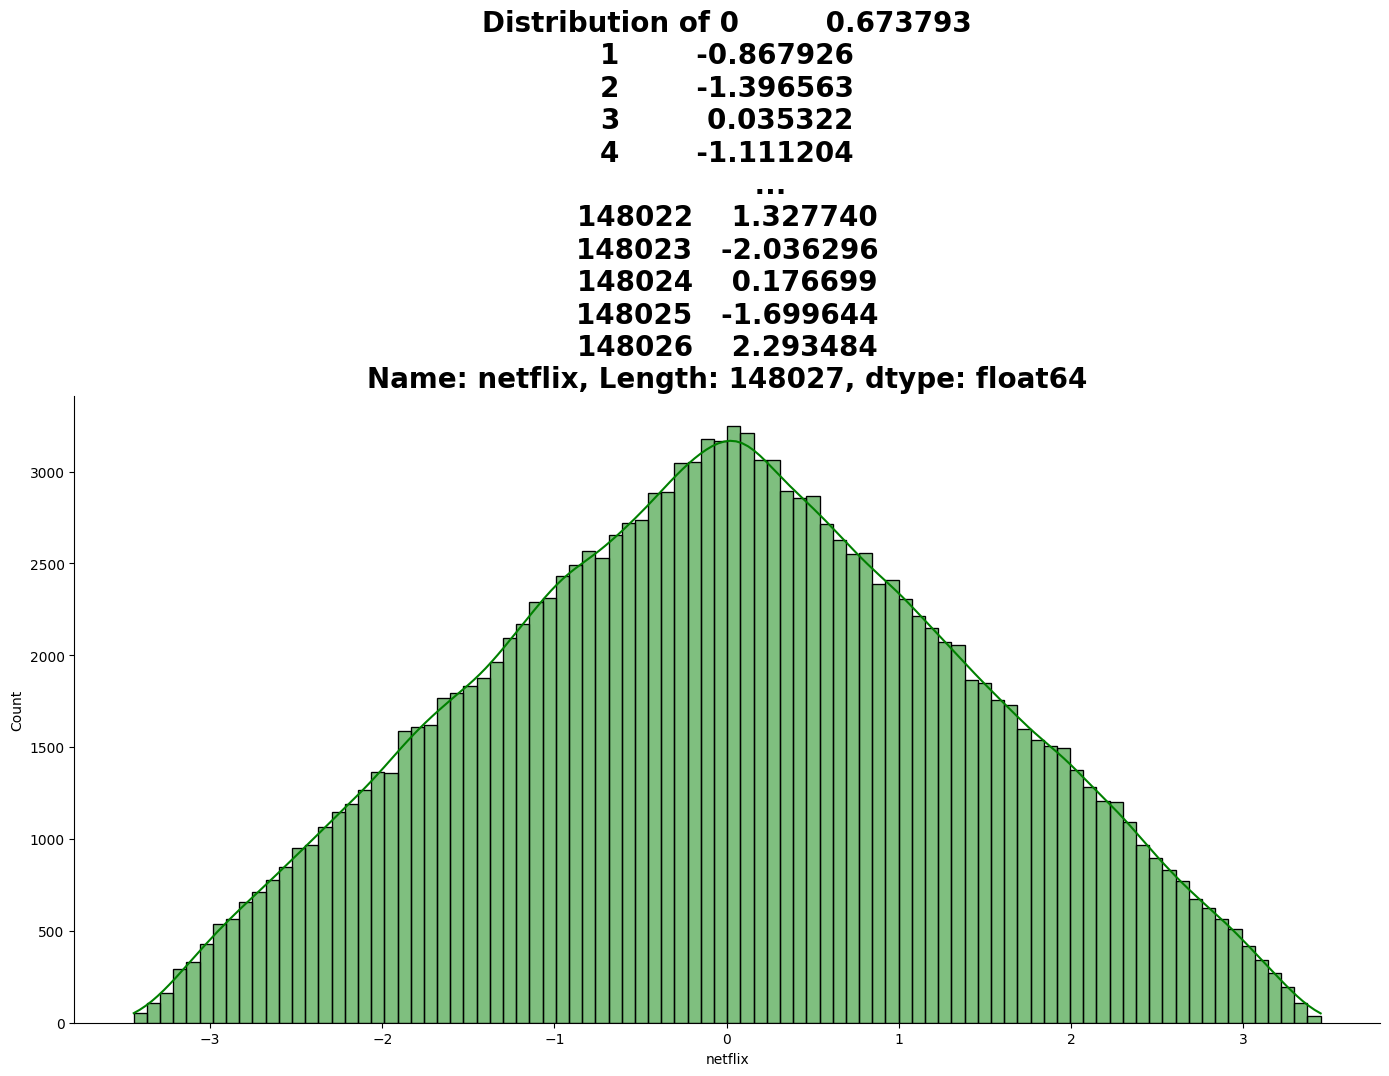

In [54]:
# Graphical Univariate analysis for Netflix
pl.plot_hist(df, df['netflix'], 'green')

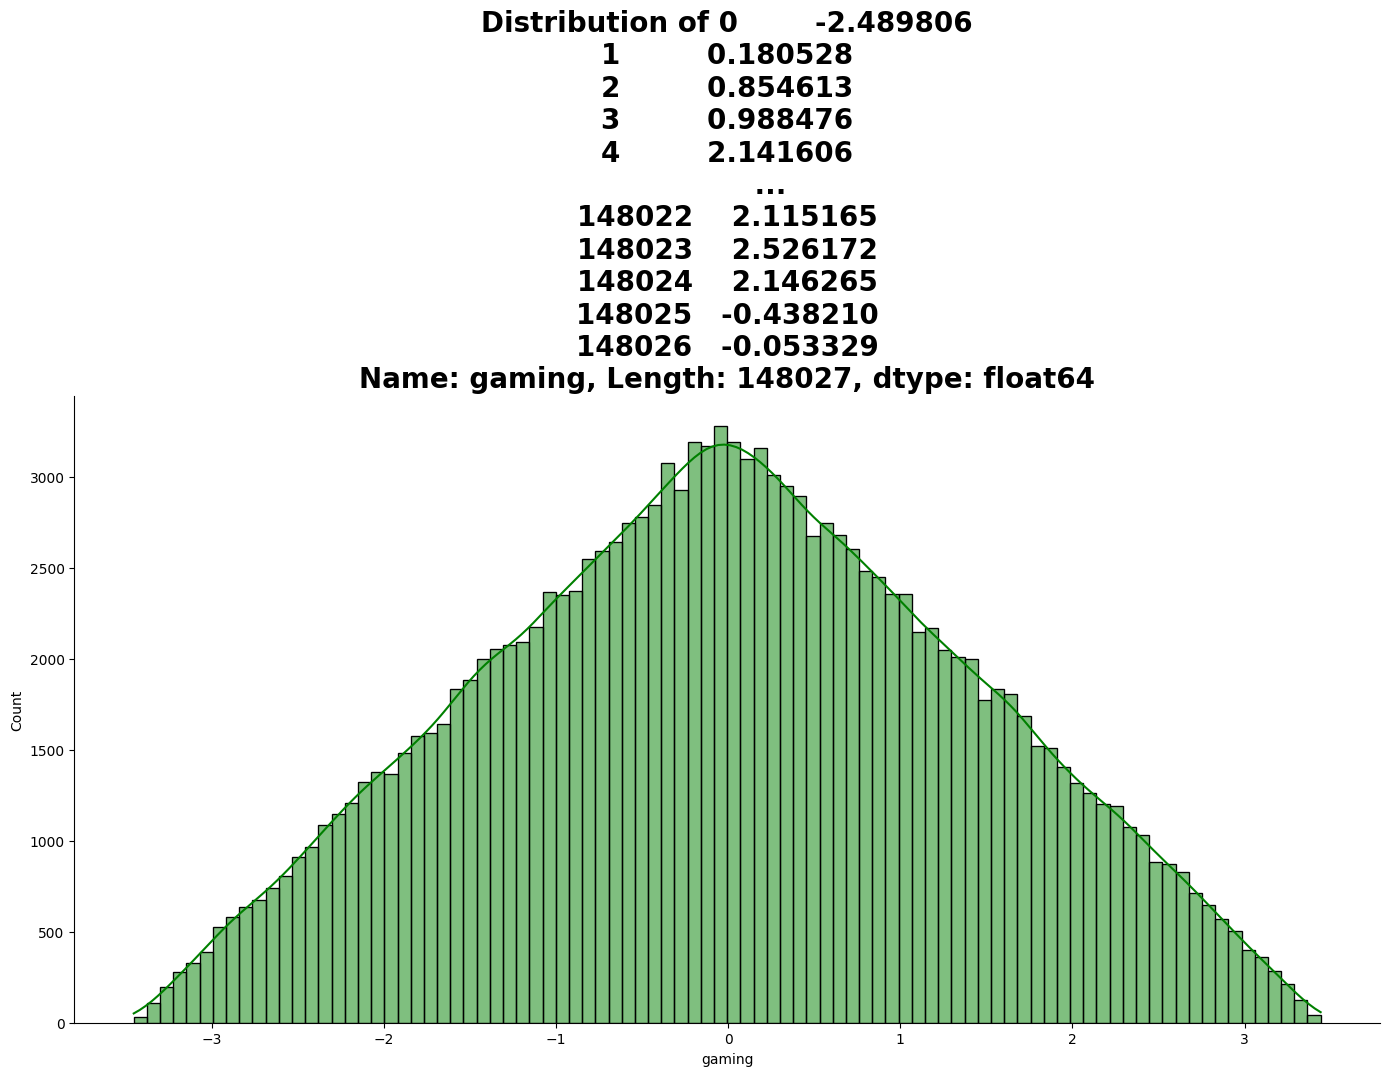

In [55]:
# Graphical Univariate analysis for Netflix
pl.plot_hist(df, df['gaming'], 'green')

Multivariate Graphical EDA
Scatter plot

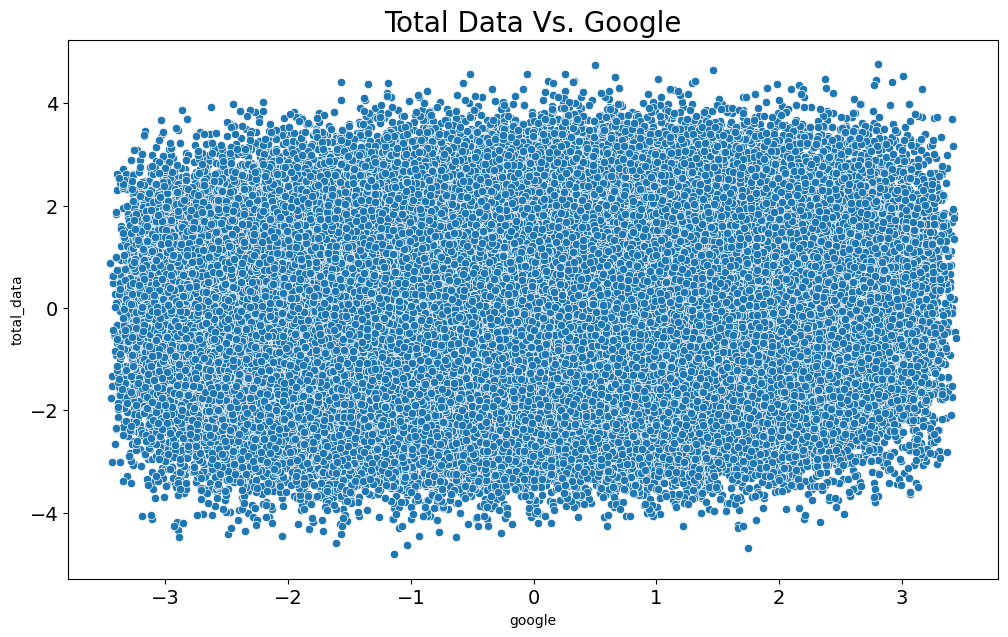

In [56]:
#  Scatter plot between total_data and google application
pl.plot_scatter(df, df['google'], df['total_data'], 'Total Data Vs. Google', None, None)

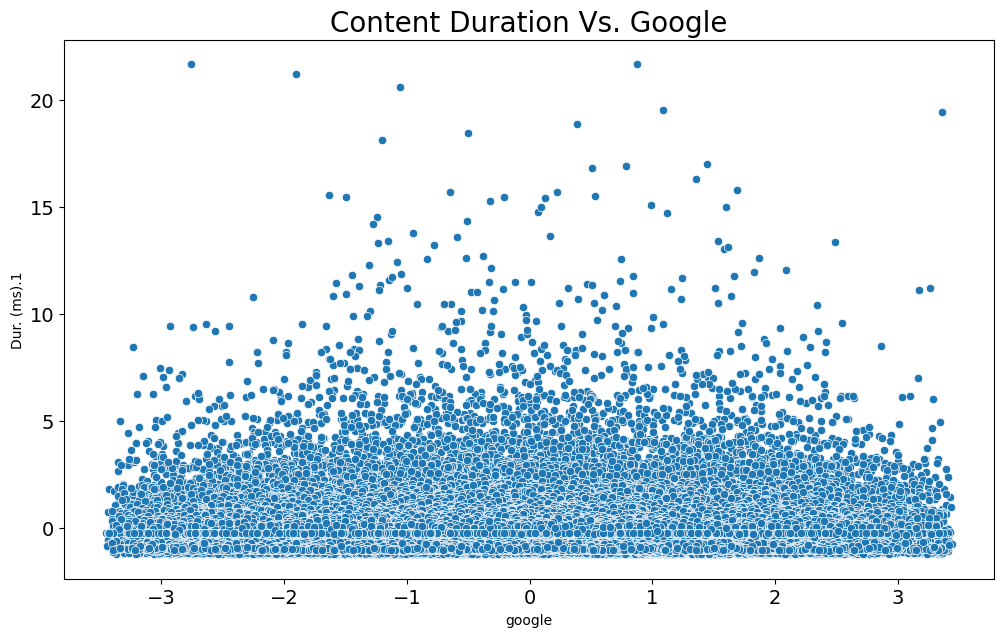

In [57]:
#  Scatter plot between total_data and google application
pl.plot_scatter(df,  df['google'], df['Dur. (ms).1'], 'Content Duration Vs. Google', None, None)

In [58]:
preprocess = PreProcess(df)

In [59]:
df2 = df.copy()

df3 = pd.read_csv("C:\\Users\\1221\\Desktop\\Telecommunication-Data\\data\\app data.csv")

feature_to_use = df3[['MSISDN/Number', 'social_media', 'google', 'email', 'youtube','netflix',
                                 'gaming',  'other', 'total_data']]

In [60]:
feature_to_use.head()

,MSISDN/Number,social_media,google,email,youtube,netflix,gaming,other,total_data
0,0.000000,36.102233,17.789960,-19.515378,4.602789,-12.750567,23.799446,1.003417,45.368012
1,-0.002626,3.739456,-1.946838,-9.773869,5.421231,5.827425,4.631681,8.154412,11.948435
2,-0.002510,11.516101,3.859361,0.493798,8.760438,-0.509017,8.293502,-6.643144,11.746888
3,-0.002621,0.864856,-5.290795,0.170160,-0.441183,4.654550,10.127952,2.155536,11.153245
4,-0.002580,-5.505663,-3.384039,3.391437,8.112635,3.256725,8.574657,0.038113,11.052603


In [61]:
total_count_app = pd.DataFrame()

# social_media_total = feature_to_use.sum()[0]
google_total = feature_to_use.sum()[1]
email_total = feature_to_use.sum()[2]
youtube_total = feature_to_use.sum()[3]
netflix_total = feature_to_use.sum()[4]
gaming_total = feature_to_use.sum()[5]
other_total = feature_to_use.sum()[6]
total_count_app['app'] = ['google', 'email', 'youtube', 'netflix', 'gaming', 'other']
total_count_app['total'] = [google_total, email_total, youtube_total, netflix_total, gaming_total,  other_total]
total_count_app.head(6)

,app,total
0,google,1.989520e-12
1,email,1.455192e-11
2,youtube,-1.129763e-11
3,netflix,1.182343e-11
4,gaming,-1.455192e-11
5,other,3.637979e-12


In [62]:
total_count_app.head()

,app,total
0,google,1.989520e-12
1,email,1.455192e-11
2,youtube,-1.129763e-11
3,netflix,1.182343e-11
4,gaming,-1.455192e-11


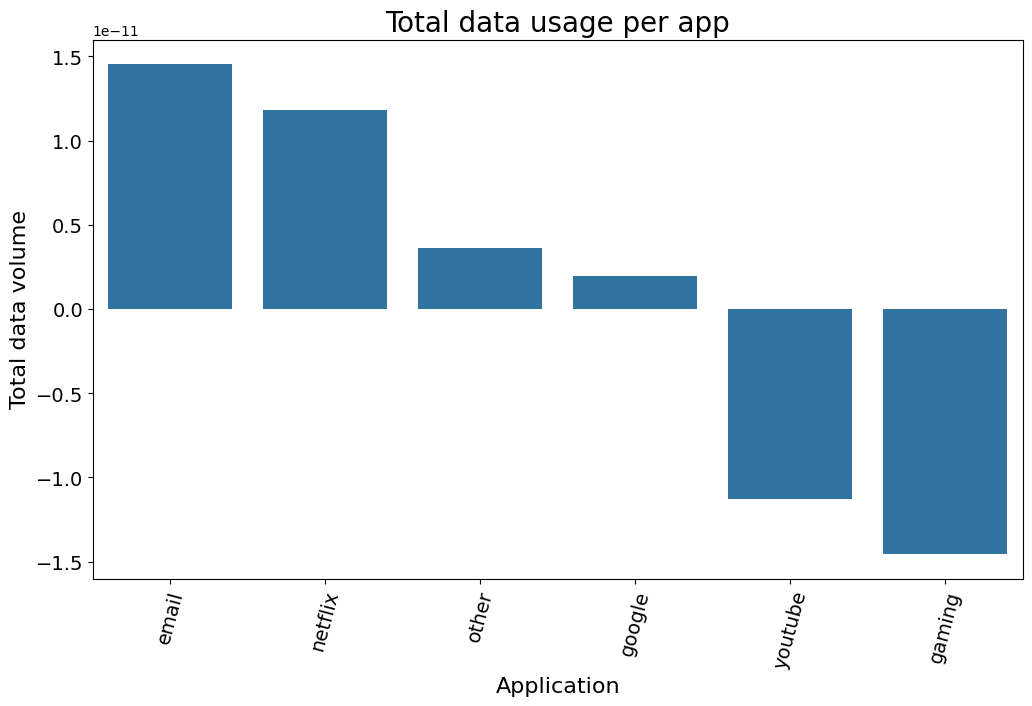

In [63]:
pl.plot_bar(total_count_app.sort_values(
            by=['total'], ascending=False), 'app', 'total', "Total data usage per app", "Application", "Total data volume")

Variable transformations

In [64]:
var_tr = df[['MSISDN/Number', 'Dur. (ms).1', 'total_data']]
var_tr.head()

,MSISDN/Number,Dur. (ms).1,total_data
0,-0.002510,-0.168128,-1.131525
1,-0.002509,0.102775,-0.721862
2,-0.002636,-0.227906,-0.687981
3,-0.002506,-0.227906,0.882648
4,-0.002624,-0.068606,0.133479


In [65]:
var_tr_agg = var_tr.groupby('MSISDN/Number').agg({'Dur. (ms).1':'sum', 'total_data': 'sum'})
var_tr_agg.shape

(106294, 2)